A look at different methods of implementing linear regression both with and without regularization.  Utilizing closed-form solutions, batch gradient descent, stochastic gradient descent, and mini-batch gradient descent.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use("fivethirtyeight")

The first dataset generated consists of 1000 100-dimensional vectors.

In [48]:
d = 100 #number of dimensions
N = 1000 #number of examples
X = np.random.normal(0, 1, size=(N, d))
w_true = np.random.normal(0, 1, size=(d, 1)) #true weights
y = X.dot(w_true) + np.random.normal(0, 0.5, size=(N, 1)) #add noise for y labels

In [7]:
all_zeros = np.reshape(np.zeros(d), (d, 1))

In [4]:
def cost(w, X, y):
    #cost function with given weights w, data matrix X, and labels y
    w, X, y = np.matrix(w), np.matrix(X), np.matrix(y)
    m = float(len(X)) #number of examples
    first = np.power((np.dot(X, w) - y), 2)
    return 1.0/(2.0*m) * np.sum(first)

In [58]:
print "Cost with all zero coefficients:", cost(all_zeros, X, y)

Cost with all zero coefficients: 42.4385962793


First implement closed form solution for linear regression without regularization.

In [5]:
def closeLinReg(X, y):
    #returns weights with closed form solution for data matrix X and labels y
    XtX = np.linalg.inv(np.dot(X.T, X)) #inverse of X tranpose multiplied by X
    return np.dot(np.dot(XtX, X.T), y)

In [59]:
wClose = closeLinReg(X, y)
print "Cost from weights found with closed-form solution:", cost(wClose, X, y)

Cost from weights found with closed-form solution: 0.107115470526


Implement a function for computing the gradient.

In [6]:
def gradient(w, X, y):
    w, X, y = np.matrix(w), np.matrix(X), np.matrix(y)
    #m = float(len(X))
    dimension = int(X.shape[1])
    errors = X*w - y
    
    grad = (1.0  * X.T * errors).T
    grad[0, 0] = np.sum(np.multiply(errors, X[:, 0])) #intercept term not regularized
    grad = np.matrix(np.reshape(np.array(grad).ravel(), (dimension, 1)))
    return grad

Implement a function for utilizing gradient function above in gradient descent in minimizing sum of squared errors and learning the weights for unregularized linear regression. This version computes the gradient utilizing the entire dataset and is sometimes referred to as using batch gradient descent.

In [7]:
def gradReg(X, y, alpha, iters, plot = False):
    dimension = int(X.shape[1])
    #initialize weights as a vector of 0s
    w = np.matrix(np.reshape(np.zeros(dimension), (dimension, 1)))
    costs = []
    
    for i in xrange(iters):
        w = w - alpha * gradient(w, X, y) #update weights
        costs.append(cost(w, X, y))
    if plot: #Plot cost vs. iteration number
        plt.plot(np.arange(iters), costs);
        plt.xlabel("Iteration")
        plt.ylabel("Cost")
    return w, costs

Use alpha = 0.0005. Converges quickly and final cost lines up with cost found with closed-form solution.

Final cost with gradient descent and alpha = 0.0005: 0.107121736085


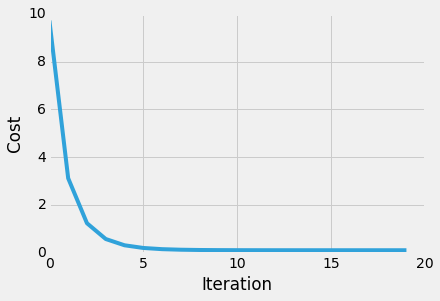

In [159]:
weights, costs = gradReg(X, y, 0.0005, 20, True)
print "Final cost with gradient descent and alpha = 0.0005:",costs[-1]

If a smaller step size by an order of magnitude alpha = 0.00005 is used, the algorithm does not converge as quickly and the final cost with the same number of steps is much larger.

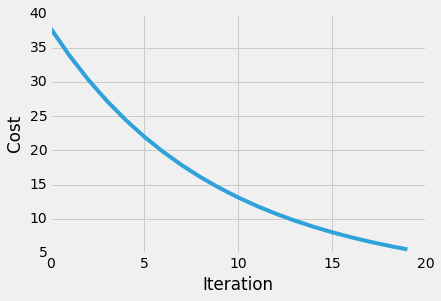

In [160]:
ws, costs = gradReg(X, y, 0.00005, 20, True)

Stochastic gradient descent steps through the dataset one datapoint at a time and updates the weight vector based on one new datapoint at a time.

In [8]:
def stocReg(X, y, alpha, iters, plot = False):
    dimension = int(X.shape[1])
    w = np.matrix(np.reshape(np.zeros(dimension), (dimension, 1))) #initialize weights to vector of 0s
    costs = []
    
    for i in xrange(iters):
        for j in xrange(dimension):
            w = w - alpha * gradient(w, X[j, :], y[j])
        costs.append(cost(w, X, y))
    if plot:
        plt.plot(np.arange(iters), costs)
        plt.xlabel("Iteration")
        plt.ylabel("Costs")
    return w, costs

Stochastic gradient descent converges but not quite to the solution found from using the closed-form equation for computing the linear regression weights.

Final cost with stochastic gradient descent: 2.4785175587


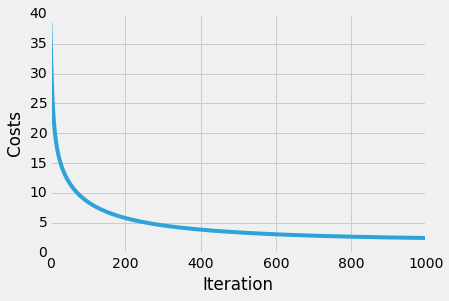

In [161]:
weights, costs = stocReg(X, y, 0.0005, 1000, True)
print "Final cost with stochastic gradient descent:", costs[-1]

Utilizing a larger alpha can cause the algorithm to diverge.

Final cost with stochastic gradient descent: 4.44896612954


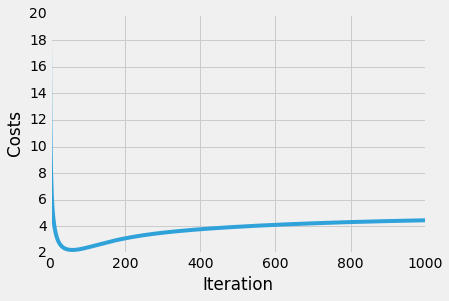

In [162]:
weights, costs = stocReg(X, y, 0.01, 1000, True)
print "Final cost with stochastic gradient descent:", costs[-1]

Mini-batch gradient descent uses k examples where k > 1 and is less than the total number of examples in the dataset.

In [152]:
def miniReg(X, y, alpha, iters, batch = 10, plot = False):
    dimension = int(X.shape[1])
    w = np.matrix(np.reshape(np.zeros(dimension), (dimension, 1))) #initialize weights to vector of 0s
    costs = []
    
    for i in xrange(iters):
        for j in range(0, dimension, batch): #utilize batch examples at a time to compute gradient
            w = w - alpha * gradient(w, X[j:(j+batch) - 1, :], y[j:(j + batch) - 1])
        costs.append(cost(w, X, y))
    if plot:
        plt.plot(np.arange(iters), costs)
        plt.xlabel("Iteration")
        plt.ylabel("Costs")
    return w, costs

Batch gradient descent with batch size = 50 converges but not very close to closed-form solution.

Final cost with batch size = 50: 2.40253293392


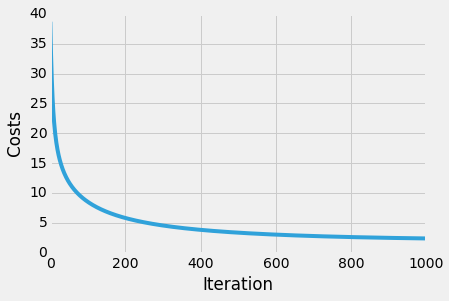

In [163]:
weights, costs = miniReg(X, y, 0.0005, 1000, 50, True)
print "Final cost with batch size = 50:", costs[-1]

Create a function for generating training and test data of a given dimension and number of points.

In [3]:
def gen_data(train_n, test_n, d):
    X_train = np.random.normal(0, 1, size=(train_n, d))
    w_true = np.random.normal(0, 1, size=(d, 1))
    y_train = X_train.dot(w_true) + np.random.normal(0, 0.5, size=(train_n, 1))
    X_test = np.random.normal(0, 1, size=(test_n, d))
    y_test = X_test.dot(w_true) + np.random.normal(0, 0.5, size=(test_n, 1))
    return w_true, X_train, y_train, X_test, y_test

Consider the case where  d = n.  Here d = 100 and there are 100 training examples and the test set has 1000 test examples.  10 sets of data are generated and linear regression is fit without regularization. Training error is very small while test set error is much higher.

In [10]:
train_errors = []
test_errors = []
for i in range(10):
    wtrue, Xtrain, ytrain, Xtest, ytest = gen_data(100, 1000, 100)
    wClose = closeLinReg(Xtrain, ytrain)
    train_errors.append(cost(wClose, Xtrain, ytrain))
    test_errors.append(cost(wClose, Xtest, ytest))
print "Average training error:", np.mean(train_errors)
print "Average testing error:", np.mean(test_errors)

Average training error: 2.44622522056e-21
Average testing error: 164.203287236


Define a function for the closed form solution for regularized regression.

In [12]:
def ridge(X, y, lamb):
    X, y = np.matrix(X), np.matrix(y)
    XtX = np.linalg.inv(np.dot(X.T, X) + lamb * np.identity(int(X.shape[1])))
    return np.dot(np.dot(XtX, X.T), y)

Run regularized regression with a range of different lambda values.  When lambda is small, essentially same as unregularized regression. 

In [67]:
def ridge_trial(train_n, test_n, dimension, numtrials):
    avg_train_errors = []
    avg_test_errors = []
    avg_l2_norms = []
    lambdas = [0.0005, 0.005, 0.001, 0.01, 0.05, 0.5, 5, 10, 50, 500]
    for lamb in lambdas:
        train_errors = []
        test_errors = []
        l2_norms = []
        for i in range(numtrials):
            wtrue, Xtrain, ytrain, Xtest, ytest = gen_data(train_n, test_n, dimension)
            wReg = ridge(Xtrain, ytrain, lamb)
            train_errors.append(cost(wReg, Xtrain, ytrain))
            test_errors.append(cost(wReg, Xtest, ytest))
            l2_norms.append(float(np.sqrt(sum(np.power(wReg, 2)))[0]))
        avg_train_errors.append(np.mean(train_errors))
        avg_test_errors.append(np.mean(test_errors))
        avg_l2_norms.append(np.mean(l2_norms))
        print "Lambda = %0.4f, Test error = %0.2f" %(lamb, np.mean(test_errors))
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.plot(lambdas, avg_train_errors, label = "Training Error")
    plt.plot(lambdas, avg_test_errors, label = "Test Error")
    plt.xlabel("Lambda")
    plt.xscale("log")
    plt.ylabel("Error")
    plt.legend(loc="best")
    plt.subplot(1, 2, 2)
    plt.plot(lambdas, avg_l2_norms)
    plt.xlabel("Lambda")
    plt.xscale("log")
    plt.ylabel("L2 Norm")

Using a lambda value of around 0.50 appears to achieve the best results on the test data. In this case the number of training examples is equal to the dimension of the data.

Lambda = 0.0005, Test error = 59.46
Lambda = 0.0050, Test error = 8.17
Lambda = 0.0010, Test error = 33.81
Lambda = 0.0100, Test error = 4.61
Lambda = 0.0500, Test error = 3.81
Lambda = 0.5000, Test error = 2.42
Lambda = 5.0000, Test error = 6.38
Lambda = 10.0000, Test error = 7.95
Lambda = 50.0000, Test error = 17.58
Lambda = 500.0000, Test error = 37.37


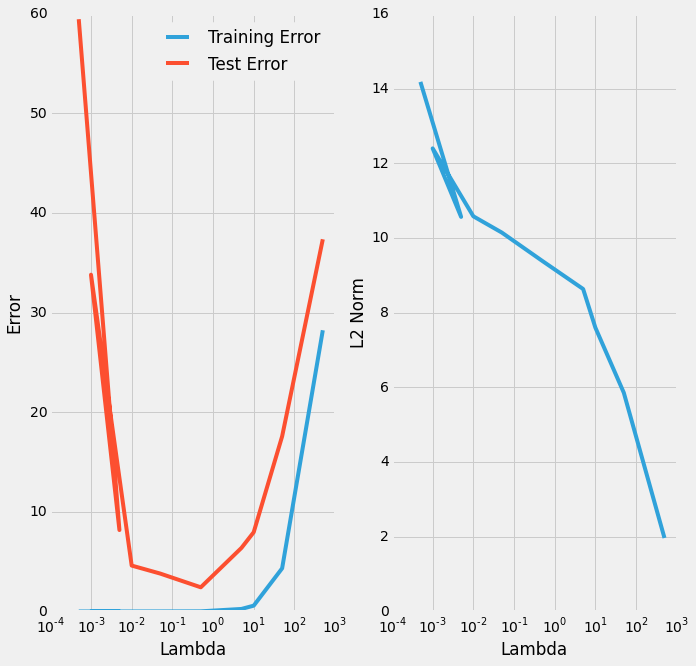

In [68]:
ridge_trial(100, 1000, 100, 10)

When the number of training examples (100) is smaller than the dimension of the data (200), ridge regression does not perform very well with any of the selected values of the regularization parameter lambda.

Lambda = 0.0005, Test error = 51.92
Lambda = 0.0050, Test error = 49.59
Lambda = 0.0010, Test error = 51.31
Lambda = 0.0100, Test error = 50.59
Lambda = 0.0500, Test error = 49.58
Lambda = 0.5000, Test error = 51.06
Lambda = 5.0000, Test error = 50.83
Lambda = 10.0000, Test error = 49.88
Lambda = 50.0000, Test error = 52.24
Lambda = 500.0000, Test error = 81.30


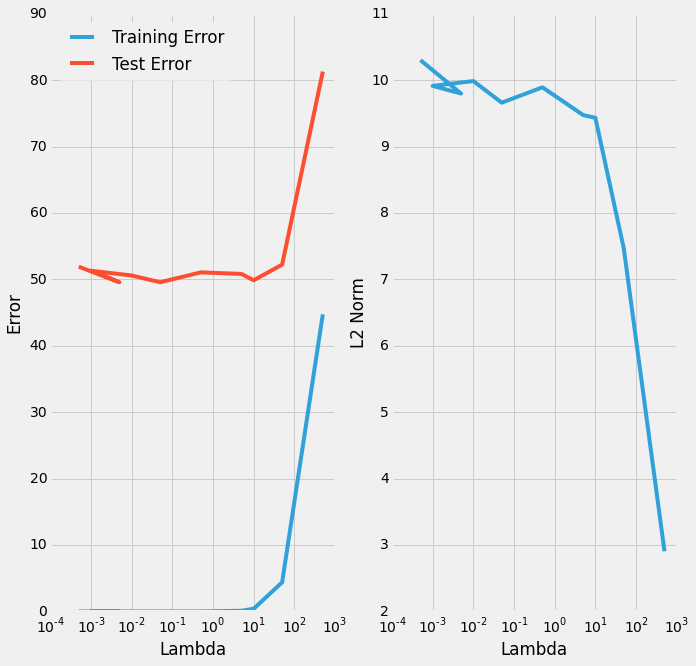

In [69]:
ridge_trial(100, 1000, 200, 10)

Modify stochastic gradient descent regression function to calculate cost every 100 iterations and utilize this for plotting training and test cost vs. iteration number.

In [83]:
def stocReg(Xtrain, ytrain, Xtest, ytest, alpha, iters, plot = False, radius = 0.0):
    dimension = int(Xtrain.shape[1])
    m = int(Xtrain.shape[0])
    w = np.matrix(np.reshape(np.random.uniform(low=0.0, high=radius, size=dimension), (dimension, 1))) #initialize weights 
    if plot:
        iterations = []
        training_costs = []
        test_costs = []
        l2_norms = []
    
    for i in xrange(iters):
        for j in xrange(m):
            w = w - alpha * gradient(w, Xtrain[j, :], ytrain[j])
        if i % 10 == 0 and plot:
            iterations.append(i)
            training_costs.append(cost(w, Xtrain, ytrain))
            test_costs.append(cost(w, Xtest, ytest))
            l2_norms.append(float(np.sqrt(sum(np.power(w, 2)))[0]))
    if plot:
        plt.figure(figsize=(10, 10))
        plt.subplot(1, 2, 1)
        plt.plot(iterations, training_costs, label = "Training")
        plt.plot(iterations, test_costs, label = "Test")
        plt.xlabel("Iteration")
        plt.legend(loc="best")
        plt.ylabel("Costs")
        plt.subplot(1, 2, 2)
        plt.plot(iterations, l2_norms)
        plt.xlabel("Iteration")
        plt.ylabel("L2 Norm of Weights")
    else:
        test_costs = cost(w, Xtest, ytest)
        training_costs = cost(w, Xtrain, ytrain)
    return w, training_costs, test_costs

Run stochastic gradient descent version of unregularized linear regression with different step sizes.  Results on test set appear somewhat worse than best test errors with regularization.

In [84]:
step_sizes = [0.00005, 0.0005, 0.005]
trials = 1
train_errors = []
test_errors = []
for alpha in step_sizes:
    for t in range(trials):
        wtrue, Xtrain, ytrain, Xtest, ytest = gen_data(100, 1000, 100)
        weights, train_cost, test_cost = stocReg(Xtrain, ytrain, Xtest, ytest, alpha, 1000, False)
        train_errors.append(train_cost)
        test_errors.append(test_cost)
    print "Using step size ", alpha
    print "Average training error:", np.mean(train_errors)
    print "Average test error:", np.mean(test_errors)

Using step size  5e-05
Average training error: 0.533949503172
Average test error: 6.54676565093
Using step size  0.0005
Average training error: 0.2863395255
Average test error: 4.61881635269
Using step size  0.005
Average training error: 0.191106533699
Average test error: 4.93778546214


Run stochastic gradient descent with different starting points for weights vector.

In [85]:
radii = [0.0, 0.1, 0.5, 1.0, 10, 20, 30]
train_errors = []
test_errors = []
for radius in radii:
    for t in range(trials):
        wtrue, Xtrain, ytrain, Xtest, ytest = gen_data(100, 1000, 100)
        weights, train_cost, test_cost = stocReg(Xtrain, ytrain, Xtest, ytest, 0.00005, 1000, False)
        train_errors.append(train_cost)
        test_errors.append(test_cost)
    print "Using radius ", radius
    print "Average training error:", np.mean(train_errors)
    print "Average test error:", np.mean(test_errors)

Using radius  0.0
Average training error: 0.298422602083
Average test error: 6.53319334235
Using radius  0.1
Average training error: 0.49787411928
Average test error: 9.17970803597
Using radius  0.5
Average training error: 0.460140810034
Average test error: 8.18340373605
Using radius  1.0
Average training error: 0.499600271029
Average test error: 9.48501077751
Using radius  10
Average training error: 0.455998134458
Average test error: 8.77908675268
Using radius  20
Average training error: 0.445434097639
Average test error: 8.5688383224
Using radius  30
Average training error: 0.460602417915
Average test error: 8.91040608217


If step size alpha is too large, stochastic gradient descent can fail to converge.

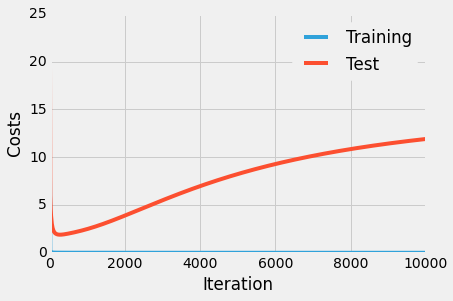

In [42]:
wtrue, Xtrain, ytrain, Xtest, ytest = gen_data(100, 1000, 100)
weights, train_cost, test_cost = stocReg(Xtrain, ytrain, Xtest, ytest, 0.005, 10000, True)

As L2 norm of the learned weights vector increases beyond a certain point, the generalization error begins to diverge as well. Step size appears to be too large.

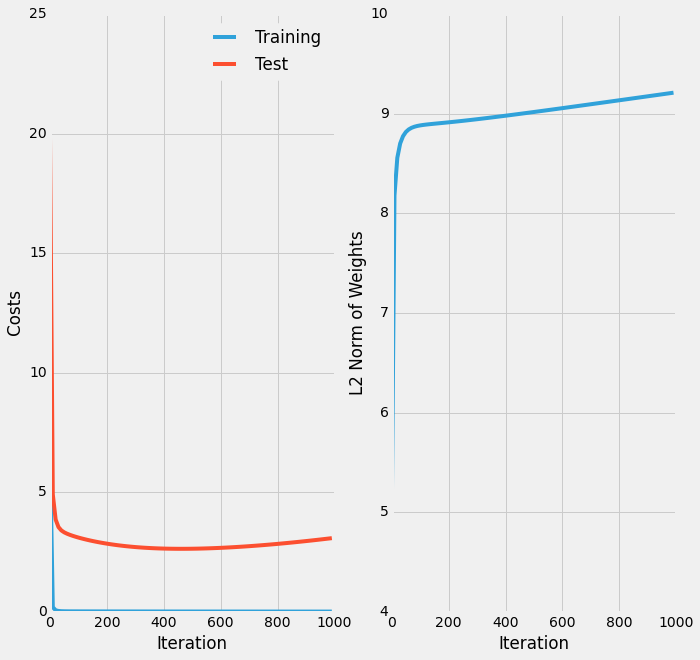

In [58]:
wtrue, Xtrain, ytrain, Xtest, ytest = gen_data(100, 1000, 100)
weights, train_cost, test_cost = stocReg(Xtrain, ytrain, Xtest, ytest, 0.005, 1000, True)

With a smaller step size alpha, performance is improved.

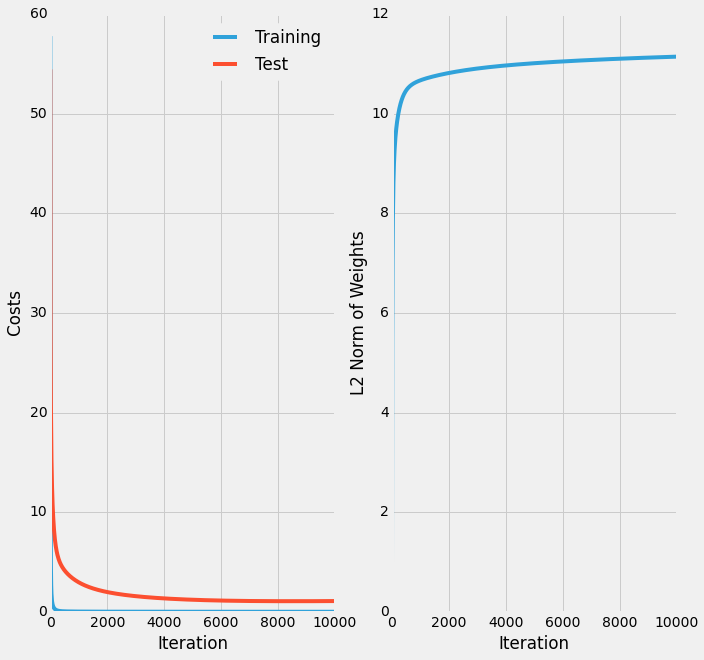

In [79]:
wtrue, Xtrain, ytrain, Xtest, ytest = gen_data(100, 1000, 100)
weights, train_cost, test_cost = stocReg(Xtrain, ytrain, Xtest, ytest, 0.0005, 10000, True)

Here the number of training examples (100) is smaller than the number of dimensions of the data (200). There is a large gap between the training and test error. Getting more training data could reduce this gap.

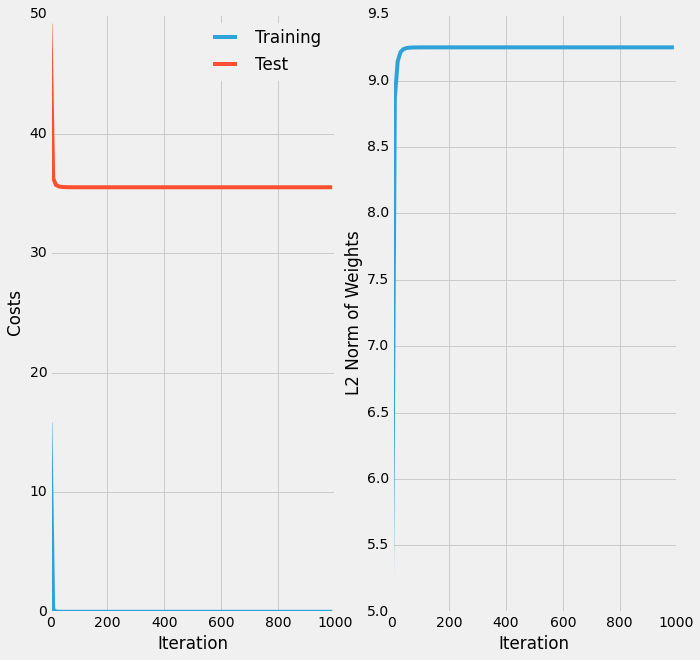

In [75]:
wtrue, Xtrain, ytrain, Xtest, ytest = gen_data(100, 1000, 200)
weights, train_cost,  test_cost = stocReg(Xtrain, ytrain, Xtest, ytest, 0.0025, 1000, True)